## Fraudulent credit card transactions prediction

##### Business Problem
For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

##### Understanding and formulating solution

Here we will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. 

The fraudalent transactions/observations are labelled with 1 and 0, otherwise.

We will be following the steps in devising solution: <br>
>   -  Import required libraries and load the dataset<br>
>   -  Basic data sanity check<br>
>   -  Exploratory data analysis on the complete data<br> 
>   -  Train-Test Split<br>
>   -  Deal with the imbalanced dataset<br>
>   -  EDA on the resampled data
>   -  Data Transformation:<br>
>        >    -  Trasform data distribution into gaussian distribution if required<br>
>        >    -  Scale the data<br>
>   -  Modelling along with hypertuning<br>
>        >    -  Logistic Regression<br>
>        >    -  Random Forest Classifier<br>
>        >    -  XGBoost<br>
>        >    -  KNN<br>
>        >    -  MultiLayer Perceptron Classifier(sklearn)<br>
>   -  Final Insights<br>

#### Importing Required Libaries and Loading the dataset

In [384]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

from sklearn.metrics import roc_curve
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as XGB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

import warnings
warnings.simplefilter('ignore')

In [327]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Sanity Check

In [328]:
df.shape

(284807, 31)

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [330]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [331]:
# Checking the percentage of missing values in the dataset

((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

In [332]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [333]:
print("Percentage of observation with Fraudalant Transactions: " + str(float((492/284315)*100)))

Percentage of observation with Fraudalant Transactions: 0.17304750013189596


In [334]:
# Before jumping to EDA, lets seperate the independent variables and the target variable

df_X = df.loc[:, df.columns != "Class"]
df_X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [335]:
df_y = df["Class"]
df_y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

#### Exploratory Data Analysis on Complete data

<AxesSubplot:xlabel='Class', ylabel='count'>

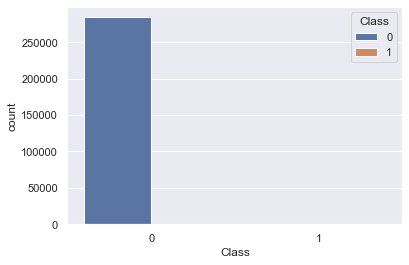

In [336]:
# Though we know the distribution of target variable but lets plot it

sns.countplot(df_y, hue=df_y)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

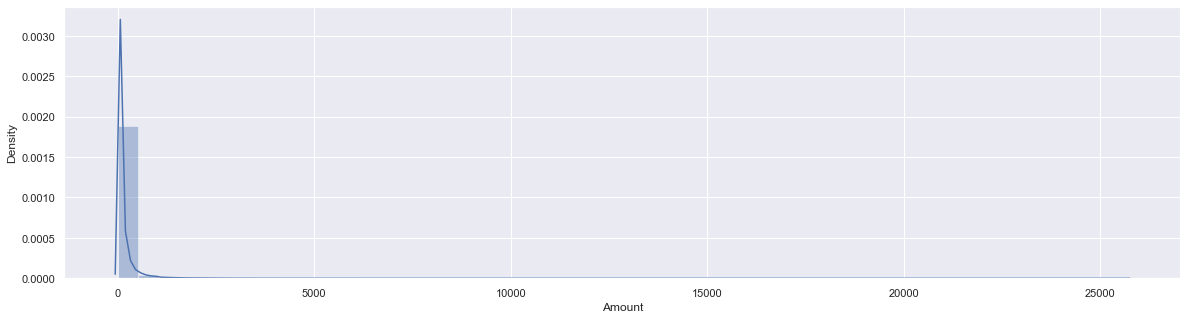

In [337]:
# Lets check the distribution of Amount

plt.figure(figsize=(20, 5))
sns.distplot(df.Amount)

In [338]:
# Lets check the amount for fraudulent transactions

df[df.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

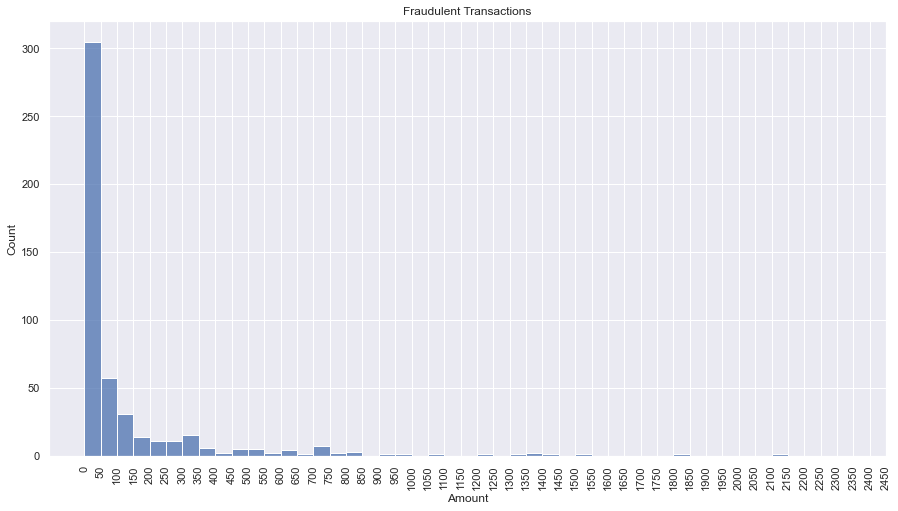

In [339]:
# Lets plot the distribution of Amount for Fraudulent transactions

plt.figure(figsize=(15, 8))
plt.title("Fraudulent Transactions")
sns.histplot(df[df.Class==1].Amount, binwidth=50)
plt.xticks(range(0, 2500, 50), range(0, 2500, 50), rotation=90)
plt.show()

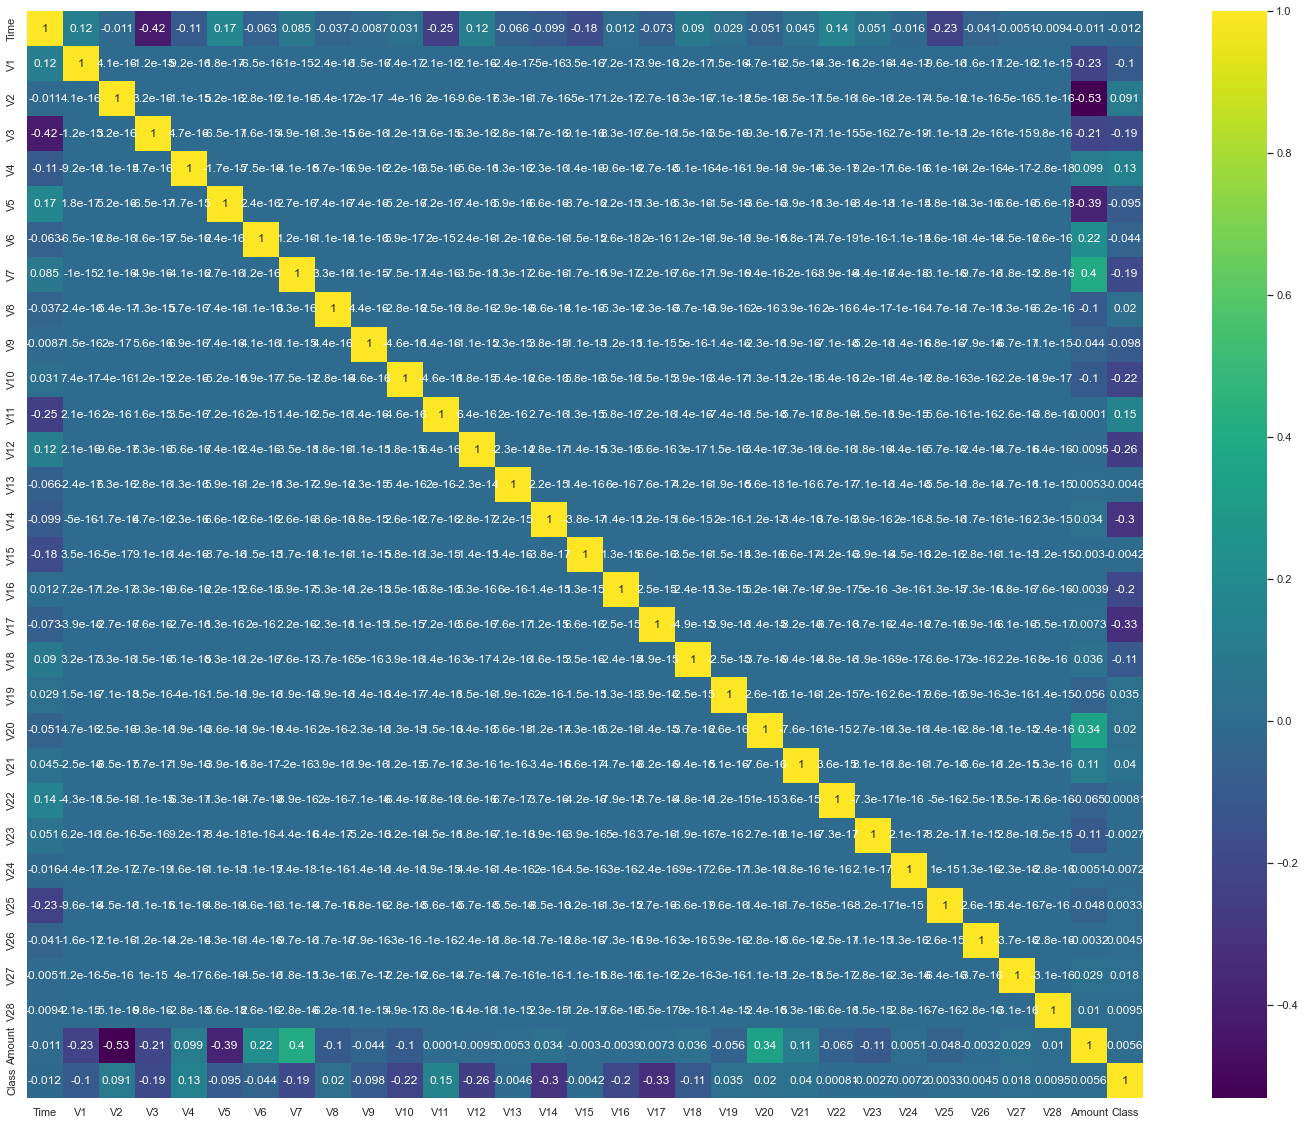

In [340]:
#Lets plot the correlation matrix

plt.figure(figsize = (25,20))
sns.heatmap(df.corr(), annot = True, cmap="viridis")
plt.show()

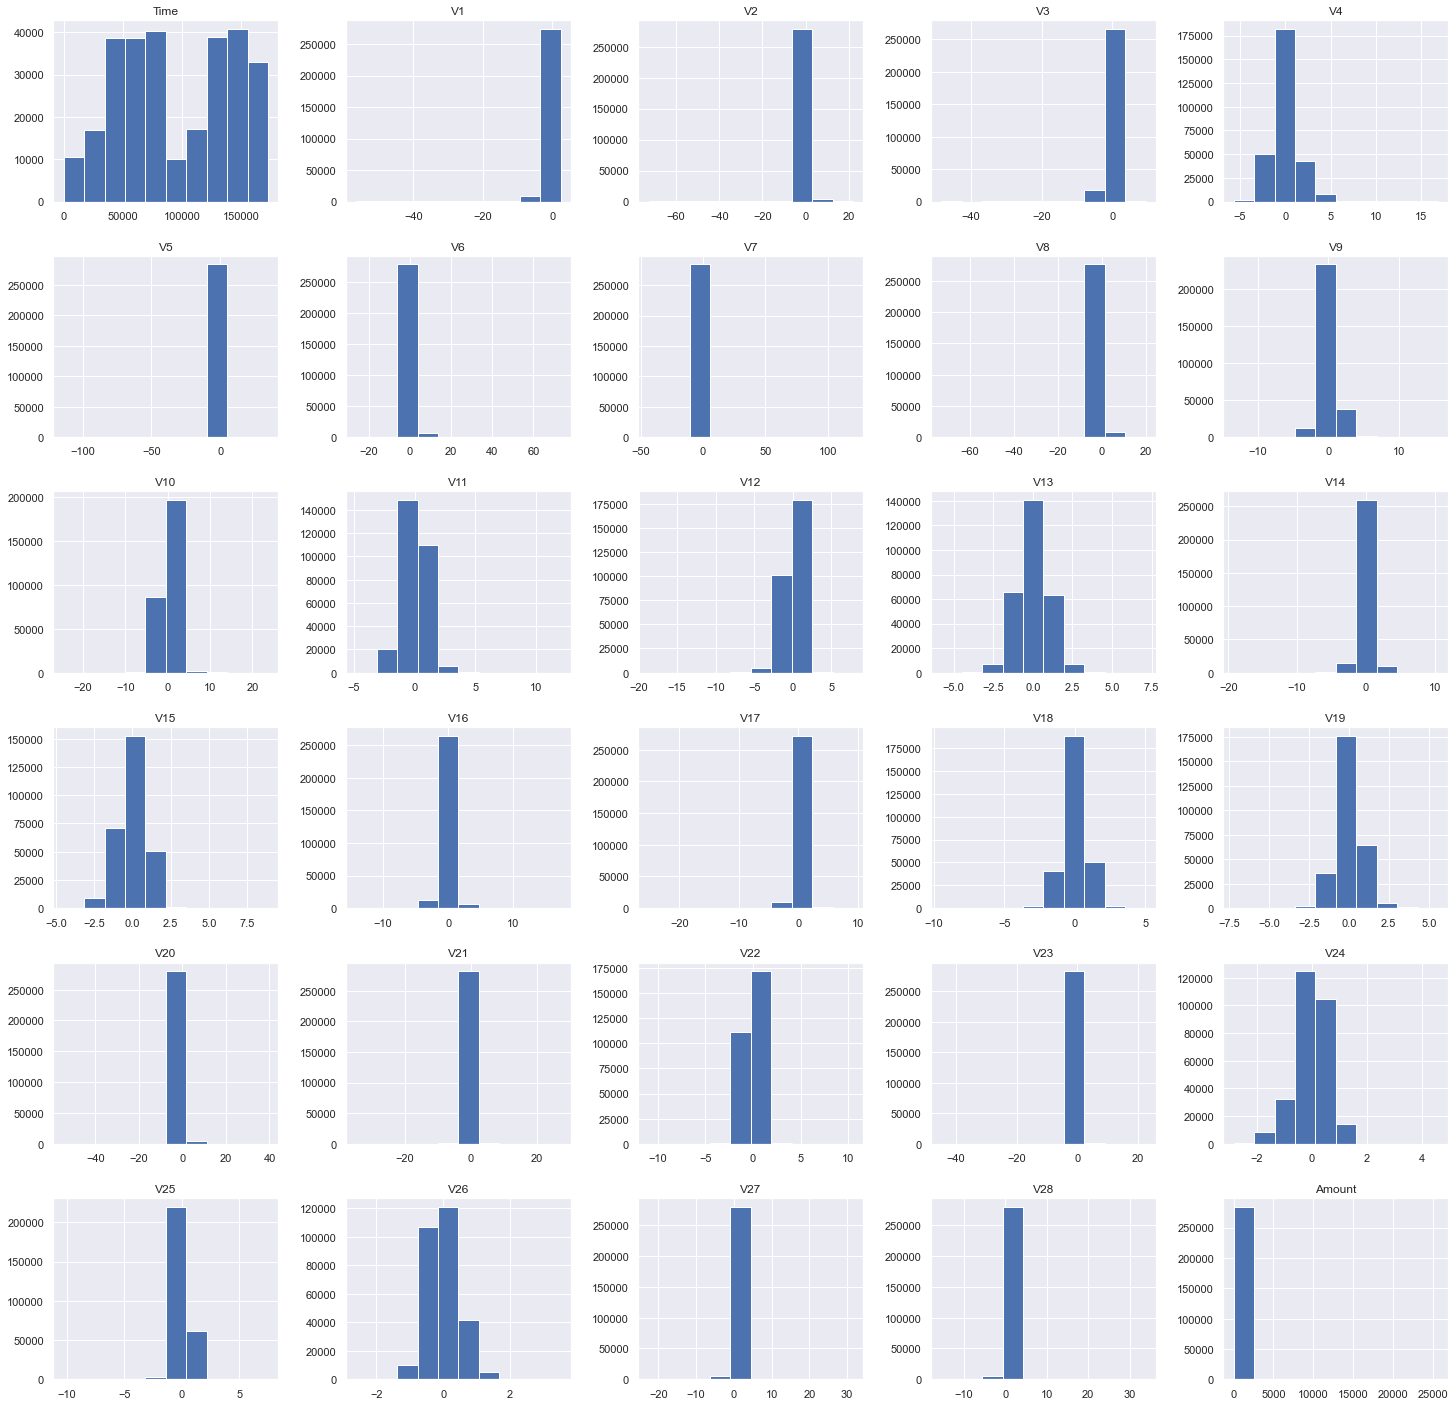

In [341]:
df_X.hist(figsize=(25,25))
plt.show()

#### Handling data imbalance

Steps to follow:<br>
>   - First create a df of non-fraudalent transactions from original data<br>
>   - Create a df of fraudalent transactions from original data<br>
>   - Create another df with 50% of observations from the first dataframe(Undersample)<br>
>   - Merge this new df with fraudalent tran. df<br>
>   - Train-Test Split<br>
>   - Create synthetic instances of fraudalent transactions(SMOTE)<br><br>

** I am undersampling in order to decrese the time and computation consumption

In [342]:
# Creating a dataframe with non-fraud transactions

df_nf = df.loc[df.Class == 0]
df_nf.shape

(284315, 31)

In [343]:
# Creating a dataframe with fraud

df_fraud = df.loc[df.Class == 1]
df_fraud.shape

(492, 31)

In [344]:
# Creating another dataframe for non-fraud transactions with 50% of the data from df_nf

df_nfraud = df_nf.sample(frac=0.5, random_state=250)
df_nfraud.shape

(142158, 31)

In [345]:
# Merging df_nfraud and df_fraud

dfs = [df_nfraud, df_fraud]
df_sampled = pd.concat(dfs)

df_sampled.shape

(142650, 31)

In [346]:
df_sampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
263225,160848.0,-0.060930,0.792810,0.549533,-0.559478,0.210750,-1.143633,0.898718,-0.090803,-0.331547,...,-0.169511,-0.361784,0.135196,0.540048,-0.594974,0.086050,0.242364,0.093496,3.87,0
263442,160955.0,-0.214125,0.801115,0.595882,-0.866833,0.708786,-0.825052,1.439651,-0.662008,0.631996,...,-0.429828,-0.470501,-0.006121,0.042871,-0.529821,0.042078,-0.041344,-0.447498,9.84,0
106807,70134.0,1.096656,-0.059525,0.938062,1.109735,-0.487367,0.362950,-0.540190,0.184980,0.468623,...,0.121483,0.348424,-0.079077,-0.456456,0.331265,-0.303297,0.072065,0.038996,45.00,0
22099,32036.0,-0.463176,1.401325,0.620815,0.710891,0.313751,-0.325505,0.480002,0.262883,-0.902362,...,0.150556,0.416821,-0.242175,-0.414498,-0.095440,-0.283319,0.055444,0.094860,1.50,0
48690,43744.0,-1.558494,-1.511260,1.796834,-2.917201,-1.955995,1.462530,1.306078,-0.089364,0.270155,...,-0.474057,-0.329795,0.056027,-0.240396,0.176224,-0.172415,0.076207,-0.295665,465.77,0


In [347]:
# Train-test Split before oversampling

df_X = df_sampled.loc[:, df_sampled.columns != "Class"]
df_y = df_sampled['Class']

X_train, X_test, y_train, y_test = train_test_split(df_X,df_y,test_size=0.3,random_state=100,shuffle=True)

print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (99855, 30)
Shape of test data:  (42795, 30)


In [348]:
# Oversampling the Fraudalent class using SMOTE

sm = SMOTE(random_state=5)
X_train_sm, Y_train_sm = sm.fit_resample(X_train, y_train.ravel())

In [349]:
print("Shape of X_train_sm: ", X_train_sm.shape)
print("Shape of Y_train_sm: ", Y_train_sm.shape)

Shape of X_train_sm:  (198992, 30)
Shape of Y_train_sm:  (198992,)


In [350]:
# A little more inspection post oversampling

print("After OverSampling, counts of label '1': {}".format(sum(Y_train_sm == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(Y_train_sm == 0)))

After OverSampling, counts of label '1': 99496
After OverSampling, counts of label '0': 99496


#### EDA post Balancing data

<AxesSubplot:ylabel='count'>

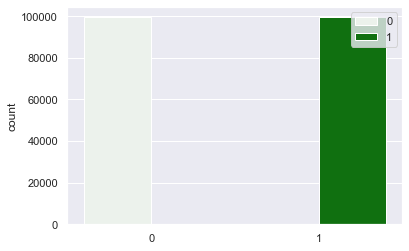

In [351]:
sns.countplot(Y_train_sm, hue=Y_train_sm, color='green')

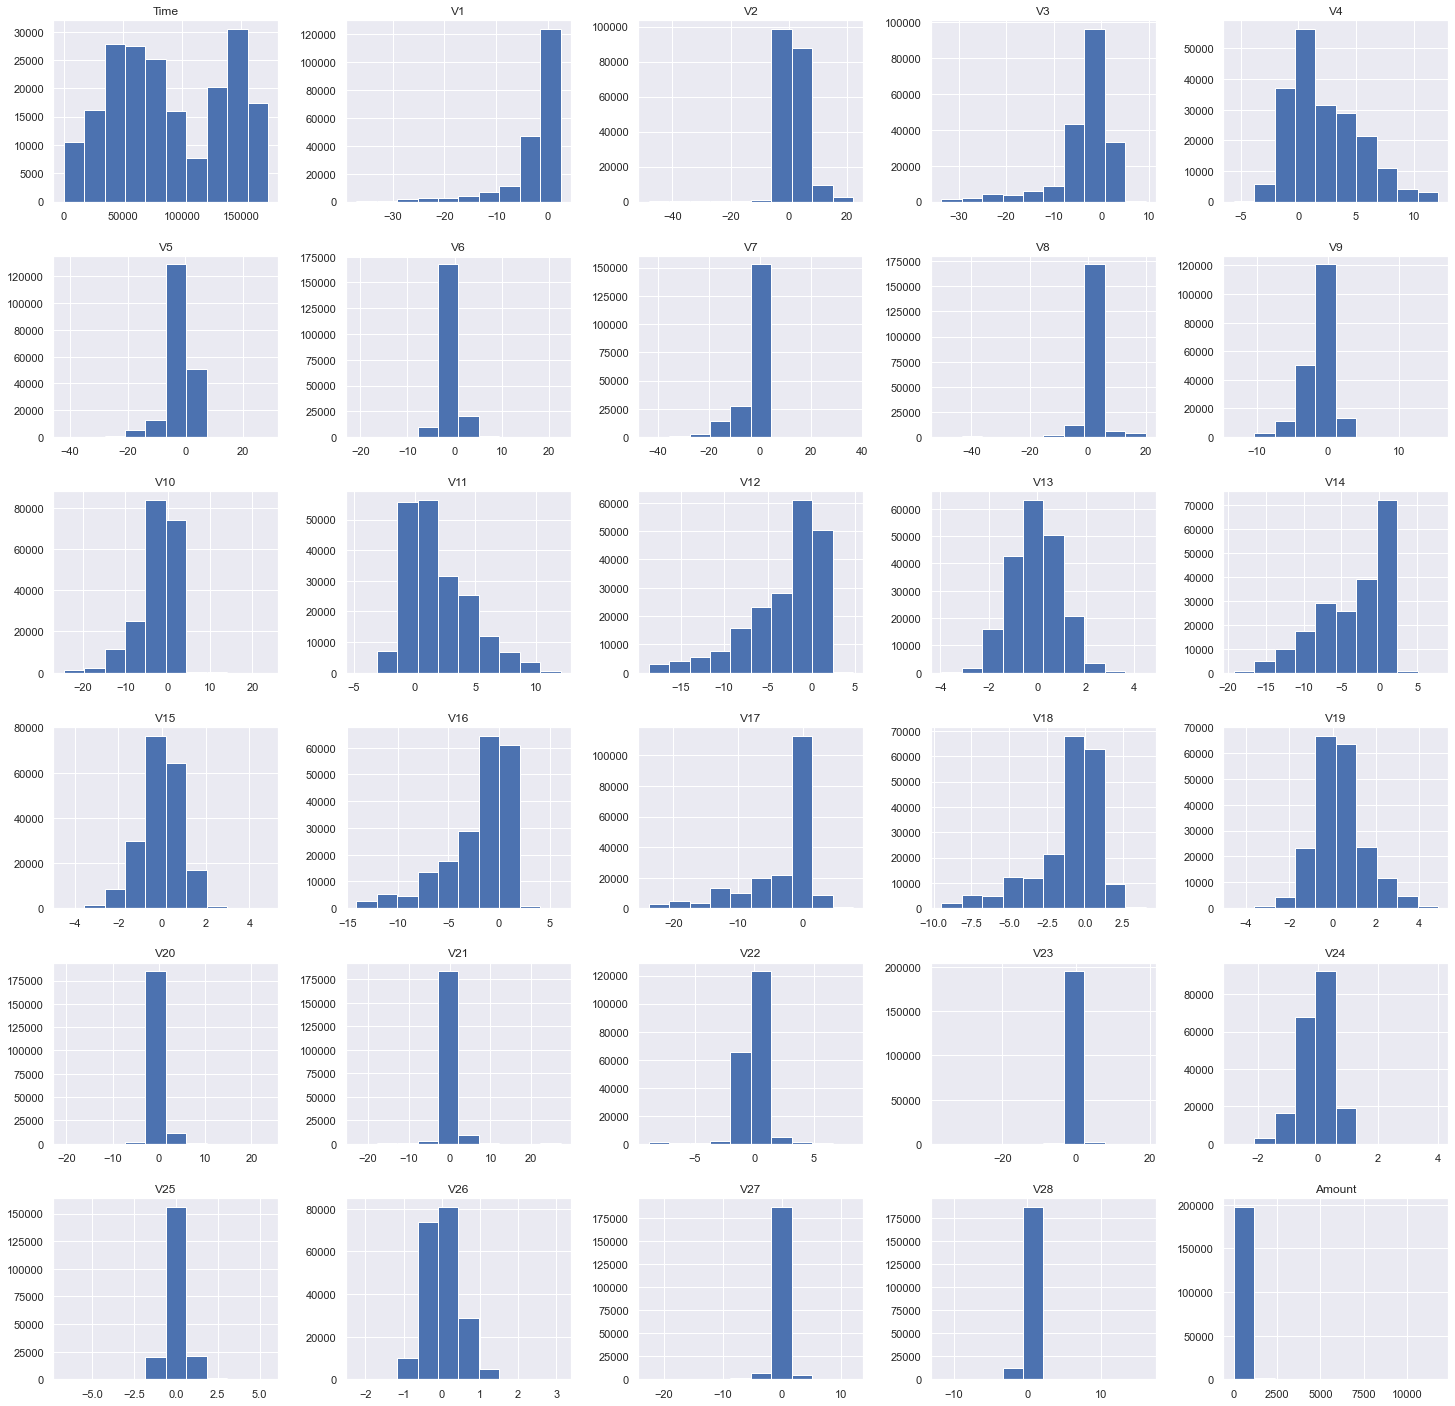

In [352]:
X_train_sm.hist(figsize=(25,25))
plt.show()

Here we can see some features are not in gaussian distribution, we will use RobustTransform to make distributions normal.

In [353]:
# Columns that need to be transformed to Normal distribution based on skewness
skewness = X_train_sm.skew()

cols = skewness[(skewness < -0.5) | (skewness > 0.5)].index

powerTra = PowerTransformer()
X_train_sm[cols] = powerTra.fit_transform(X_train_sm[cols])
X_test[cols] = powerTra.transform(X_test[cols])

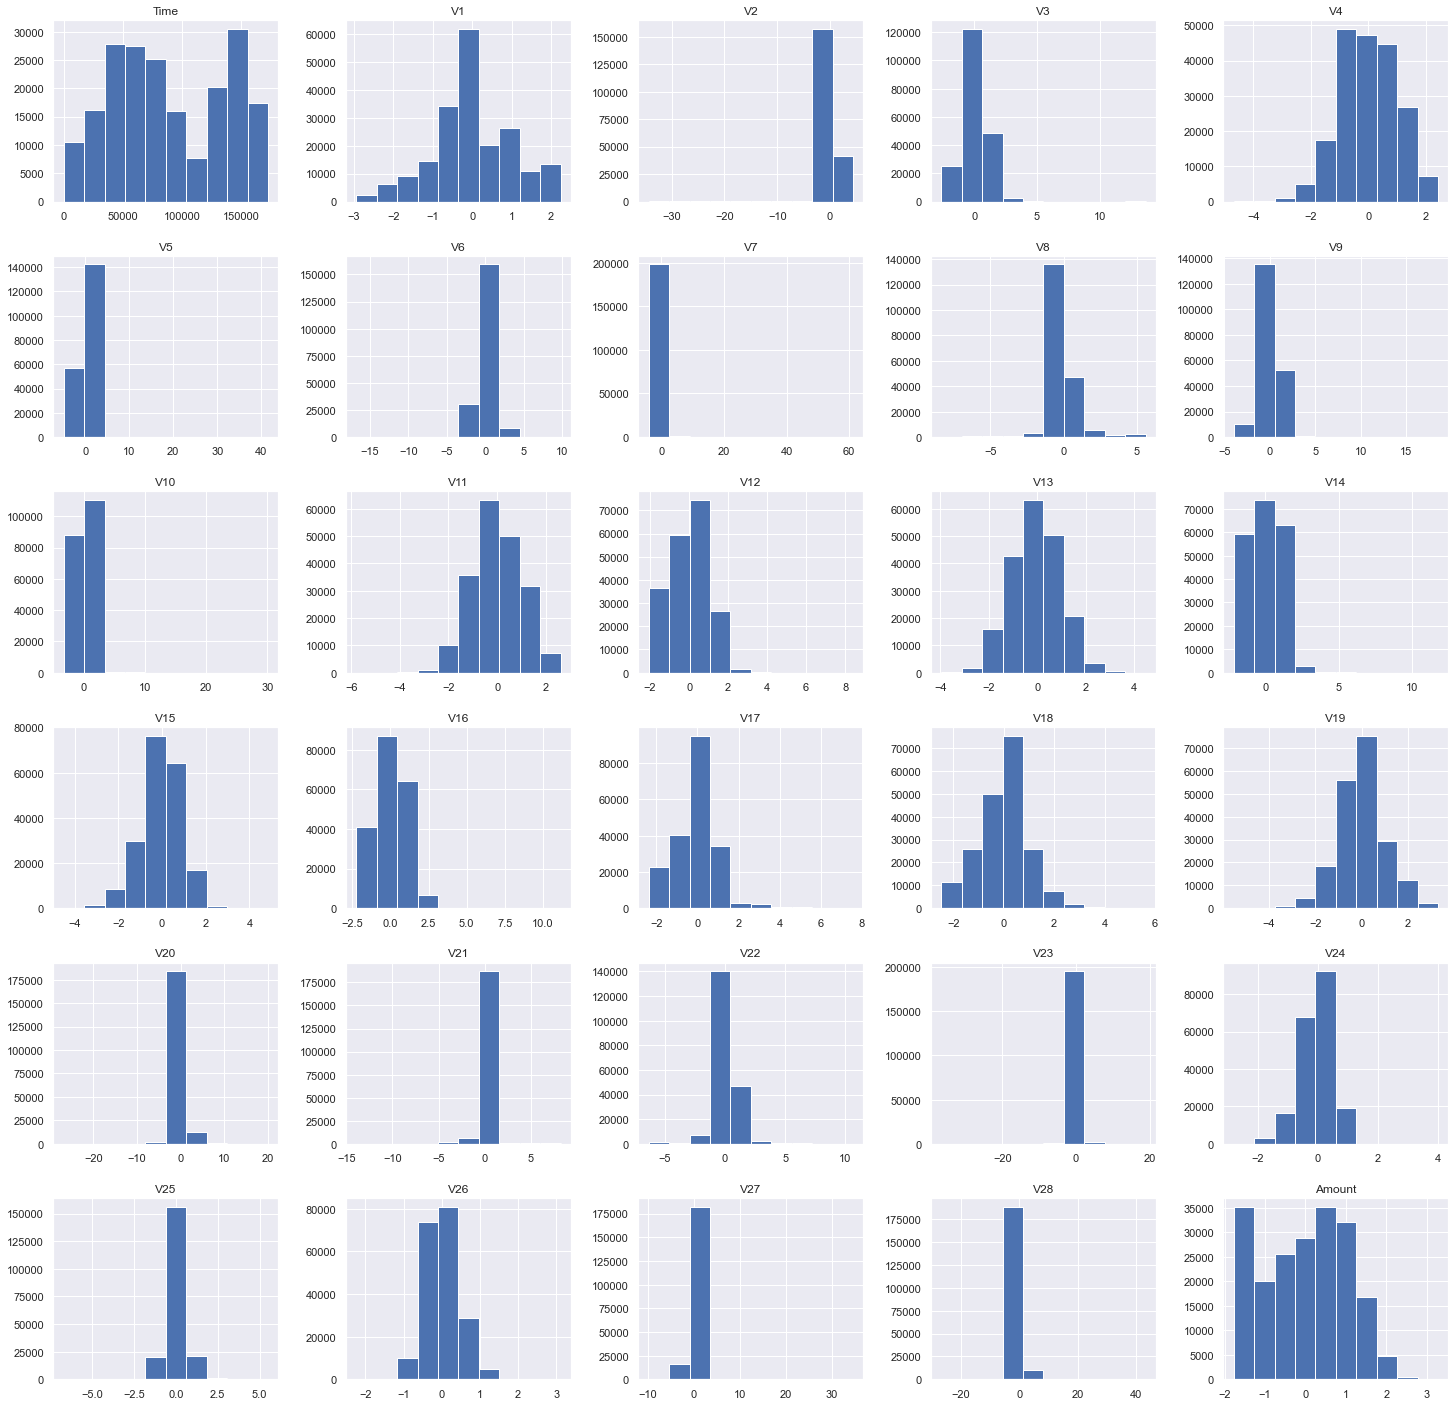

In [354]:
# Lets check the distributions again

X_train_sm.hist(figsize=(25,25))
plt.show()

#### Scaling the Data

In [355]:
X_train_sm.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,164669.0,0.295812,-0.081505,0.290079,-0.592168,0.226004,-0.661627,0.961733,-0.210661,0.419419,...,-0.302393,0.044954,1.238590,-0.018410,0.895465,-0.383499,-0.251958,-0.618542,-0.752146,0.344790
1,135831.0,-0.669882,-0.240811,0.137725,-1.265782,-0.851074,2.246158,-0.263356,-1.491857,0.370784,...,-1.189735,-0.512246,-0.344107,0.104432,0.519051,-1.423158,1.116309,0.419494,-0.982504,1.669388
2,68265.0,1.147712,-0.243313,0.202381,-0.261537,0.650383,0.273801,0.608855,-0.191552,0.447325,...,-0.139345,-0.165299,-0.283380,-0.305043,-1.096277,0.914251,-0.244322,-0.198502,0.005661,-1.378909
3,162958.0,2.105267,-1.137652,0.095969,-1.752571,-0.084104,0.705293,-0.011031,-0.100832,0.019968,...,-0.666162,-0.189796,-0.195938,0.180300,-0.367664,-0.216998,-0.160094,-0.236113,-0.243682,-0.283608
4,90395.0,0.106565,-0.200797,3.678501,0.855316,0.200303,2.004531,0.196429,-0.028096,1.305071,...,0.138711,-0.173427,0.347977,-0.438809,0.055697,0.150147,0.598710,-0.246778,-0.386960,-0.205050
5,142875.0,-0.547044,-1.238772,0.736252,-2.379786,0.018249,0.634134,0.348501,-0.081393,-0.469225,...,-1.492091,-0.247728,-0.115258,-0.114288,0.243725,0.721251,-0.168063,-0.647168,0.164065,1.106412
6,158636.0,0.402359,-0.728496,0.982396,-2.040964,-0.071903,0.381898,0.216619,-0.142226,-0.409888,...,-0.517470,-0.217899,-0.320947,0.220067,-0.386752,-1.232324,-0.551159,-0.153121,0.153099,-0.114990
7,51834.0,1.023618,-0.395748,0.805084,0.128194,0.253167,0.865823,0.303226,-0.076788,0.293868,...,-0.323412,-0.063256,0.121742,-0.203011,-0.862840,0.513256,0.155777,-0.245631,-0.076536,-0.385766
8,64370.0,-0.204813,-0.126026,1.236860,-0.261984,0.378640,0.615922,0.651651,0.007614,-0.162085,...,0.189633,-0.239855,-1.056241,0.119444,-0.376542,0.089568,-0.609107,-0.001509,-0.030285,0.554746
9,149586.0,1.023726,-1.429326,0.673154,-0.252349,-0.343198,1.171282,0.031139,-0.006295,2.471456,...,0.266258,0.023353,0.478414,-0.079468,0.819936,-0.568666,0.539086,-0.282088,-0.046149,1.465524


In [356]:
# Since most of the variables dont need scaling, we will scale Time and amount columns

mm_scaler = MinMaxScaler()

# columns that need scaling
features_sc = ['Time', 'Amount']

X_train_sm[features_sc] = mm_scaler.fit_transform(X_train_sm[features_sc])
X_test[features_sc] = mm_scaler.transform(X_test[features_sc])

In [357]:
X_train_sm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.952990,0.295812,-0.081505,0.290079,-0.592168,0.226004,-0.661627,0.961733,-0.210661,0.419419,...,-0.302393,0.044954,1.238590,-0.018410,0.895465,-0.383499,-0.251958,-0.618542,-0.752146,0.419025
1,0.786095,-0.669882,-0.240811,0.137725,-1.265782,-0.851074,2.246158,-0.263356,-1.491857,0.370784,...,-1.189735,-0.512246,-0.344107,0.104432,0.519051,-1.423158,1.116309,0.419494,-0.982504,0.680699
2,0.395070,1.147712,-0.243313,0.202381,-0.261537,0.650383,0.273801,0.608855,-0.191552,0.447325,...,-0.139345,-0.165299,-0.283380,-0.305043,-1.096277,0.914251,-0.244322,-0.198502,0.005661,0.078509
3,0.943088,2.105267,-1.137652,0.095969,-1.752571,-0.084104,0.705293,-0.011031,-0.100832,0.019968,...,-0.666162,-0.189796,-0.195938,0.180300,-0.367664,-0.216998,-0.160094,-0.236113,-0.243682,0.294885
4,0.523143,0.106565,-0.200797,3.678501,0.855316,0.200303,2.004531,0.196429,-0.028096,1.305071,...,0.138711,-0.173427,0.347977,-0.438809,0.055697,0.150147,0.598710,-0.246778,-0.386960,0.310404


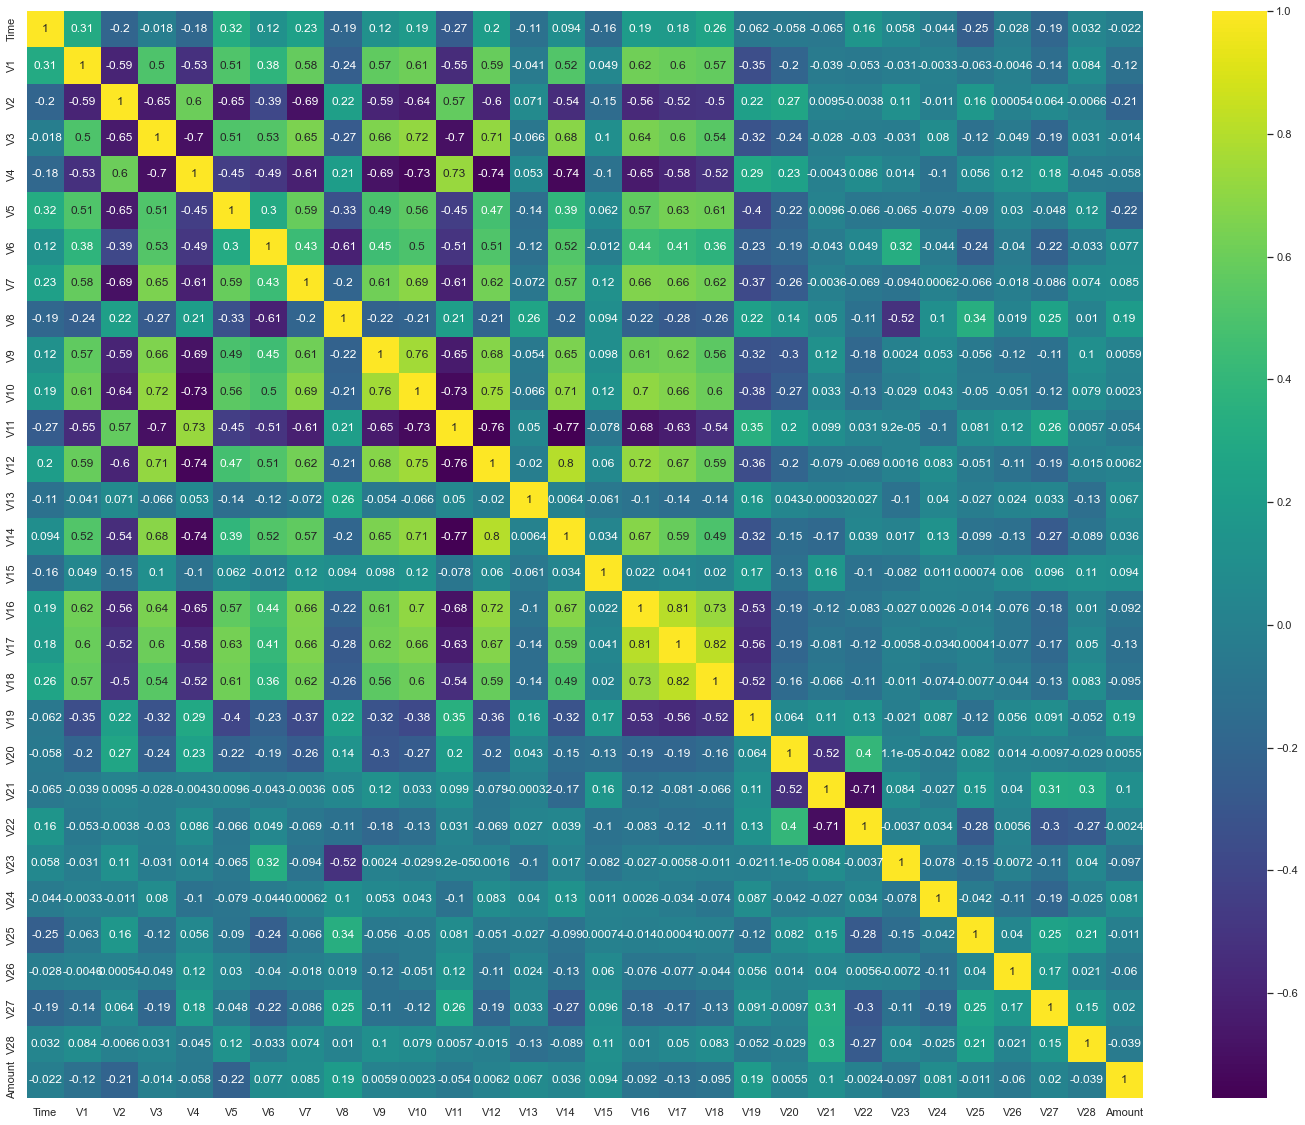

In [358]:
# Before jumping to next steps lets plot the correlation heatmap for the final train data

plt.figure(figsize = (25,20))
sns.heatmap(X_train_sm.corr(), annot = True, cmap="viridis")
plt.show()

Now that our Data is ready, lets jump to model building

#### Modelling

In [359]:
# Creating a function to plot the ROC curve

def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
                                              
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [360]:
# Creating a dataframe to keep a track of models and their performance

results = pd.DataFrame({'Model':[], 'Precision_train': [],'Recall_train': [], 'Accuracy_train':[], 'Precision_test':[], 'Recall_test':[], 'Accuracy_test':[]})
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test


In [361]:
# Lets train our first model: Logistic Regression

LogReg = LogisticRegression(random_state=23)
LogRegModel = LogReg.fit(X_train_sm, Y_train_sm)

#Making Predictions on train data set
LR_train_preds = LogRegModel.predict(X_train_sm)

#Making Predictions on train data set
LR_test_preds = LogRegModel.predict(X_test)

In [362]:
# Appending model performance to the result dataframe

#For Train data
precision = metrics.precision_score(Y_train_sm, LR_train_preds,average='macro')
recall = metrics.recall_score(Y_train_sm, LR_train_preds,average='macro')
accuracy = metrics.accuracy_score(Y_train_sm, LR_train_preds)

#For Test data
precision_test = metrics.precision_score(y_test, LR_test_preds,average='macro')
recall_test = metrics.recall_score(y_test, LR_test_preds,average='macro')
accuracy_test = metrics.accuracy_score(y_test, LR_test_preds)

tempResults = pd.DataFrame({'Model':['Logistic Regression'], 'Precision_train': [precision],'Recall_train': [recall], 'Accuracy_train':[accuracy], 'Precision_test':[precision_test], 'Recall_test':[recall_test], 'Accuracy_test':[accuracy_test]})
results = pd.concat([results, tempResults])
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.98508,0.98508,0.595712,0.934072,0.988106


In [363]:
LR_test_preds

array([0, 0, 0, ..., 0, 0, 0])

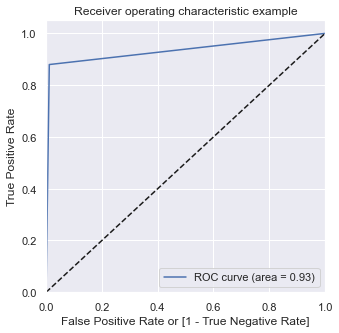

In [364]:
plot_roc(y_test, LR_test_preds)

In [365]:
# Training and testing second Model: Random Forest Classifier

RFC = RandomForestClassifier()

params = {
    'criterion':['gini','entropy'],
    'n_estimators':[15,16,17,20],
    'min_samples_leaf':[2,3,4,5],
    'min_samples_split':[2,3,4,5], 
    'random_state':[123]
}

# I am using Stratified CV

kfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

RF_model = RandomizedSearchCV(RFC, params, n_iter=10, cv =kfolds)

RF_model.fit(X_train_sm, Y_train_sm)

#Getting the best estimators/hyperparameter values
print(RF_model.best_estimator_)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       min_samples_split=5, n_estimators=20, random_state=123)


In [366]:
RF_model_f = RandomForestClassifier(n_estimators=20 , criterion='entropy', 
                                    min_samples_leaf=2 , min_samples_split=5 , random_state=123)

RF_model_f.fit(X_train_sm, Y_train_sm)

RF_model_train_pred = RF_model_f.predict(X_train_sm)

RF_model_test_pred = RF_model_f.predict(X_test)

In [367]:
# Appending model performance to the result dataframe

#For Train data
precision = metrics.precision_score(Y_train_sm, RF_model_train_pred,average='macro')
recall = metrics.recall_score(Y_train_sm, RF_model_train_pred,average='macro')
accuracy = metrics.accuracy_score(Y_train_sm, RF_model_train_pred)

#For Test data
precision_test = metrics.precision_score(y_test, RF_model_test_pred,average='macro')
recall_test = metrics.recall_score(y_test, RF_model_test_pred,average='macro')
accuracy_test = metrics.accuracy_score(y_test, RF_model_test_pred)

tempResults = pd.DataFrame({'Model':['Random Forest Classifier'], 'Precision_train': [precision],'Recall_train': [recall], 'Accuracy_train':[accuracy], 'Precision_test':[precision_test], 'Recall_test':[recall_test], 'Accuracy_test':[accuracy_test]})
results = pd.concat([results, tempResults])
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.985080,0.985080,0.595712,0.934072,0.988106
0,Random Forest Classifier,0.999955,0.999955,0.999955,0.931063,0.924601,0.999112


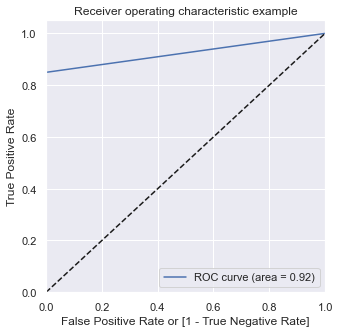

In [368]:
plot_roc(y_test, RF_model_test_pred)

In [369]:
'''
 Not re-running as it took around 20 minutes
# Training and Testing third model: KNN Classifier

KNN = KNeighborsClassifier()

params = {
    'n_neighbors': [2,3]
}

kfolds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

KNN_model = RandomizedSearchCV(KNN, params, n_iter=10, cv =kfolds)

KNN_model.fit(X_train_sm, Y_train_sm)

#Getting the best estimators/hyperparameter values
print(KNN_model.best_estimator_)

'''


"\n Not re-running as it took around 20 minutes\n# Training and Testing third model: KNN Classifier\n\nKNN = KNeighborsClassifier()\n\nparams = {\n    'n_neighbors': [2,3]\n}\n\nkfolds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)\n\nKNN_model = RandomizedSearchCV(KNN, params, n_iter=10, cv =kfolds)\n\nKNN_model.fit(X_train_sm, Y_train_sm)\n\n#Getting the best estimators/hyperparameter values\nprint(KNN_model.best_estimator_)\n\n"

In [370]:
# Taking n_neighbors = 3

KNN_model_f = KNeighborsClassifier(n_neighbors=3)

KNN_model_f.fit(X_train_sm, Y_train_sm)

KNN_model_train_pred = KNN_model_f.predict(X_train_sm)

KNN_model_test_pred = KNN_model_f.predict(X_test)

In [371]:
# Appending model performance to the result dataframe

#For Train data
precision = metrics.precision_score(Y_train_sm, KNN_model_train_pred,average='macro')
recall = metrics.recall_score(Y_train_sm, KNN_model_train_pred,average='macro')
accuracy = metrics.accuracy_score(Y_train_sm, KNN_model_train_pred)

#For Test data
precision_test = metrics.precision_score(y_test, KNN_model_test_pred,average='macro')
recall_test = metrics.recall_score(y_test, KNN_model_test_pred,average='macro')
accuracy_test = metrics.accuracy_score(y_test, KNN_model_test_pred)

tempResults = pd.DataFrame({'Model':['KNN Classifier'], 'Precision_train': [precision],'Recall_train': [recall], 'Accuracy_train':[accuracy], 'Precision_test':[precision_test], 'Recall_test':[recall_test], 'Accuracy_test':[accuracy_test]})
results = pd.concat([results, tempResults])
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.985080,0.985080,0.595712,0.934072,0.988106
0,Random Forest Classifier,0.999955,0.999955,0.999955,0.931063,0.924601,0.999112
0,KNN Classifier,0.999563,0.999563,0.999563,0.792947,0.920127,0.997663


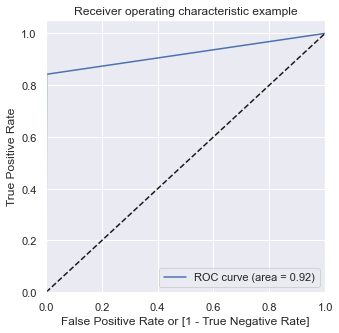

In [372]:
plot_roc(y_test, KNN_model_test_pred)

In [373]:
# Training our 4th model: XGBoost Classifier

XGB_m = XGB.XGBClassifier(eval_metric='logloss', use_label_encoder=False)

params = {
    'min_child_weight':[11,12,14,15],
    'max_depth':[5,6],
    'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3, 0.5],
    'n_estimators':stats.randint(10, 200)
}

kfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)

XGB_model  = RandomizedSearchCV(XGB_m, params, n_jobs=-1,cv=kfolds)

XGB_model.fit(X_train_sm, Y_train_sm)


#Getting the best estimators/hyperparameter values
print(XGB_model.best_estimator_)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=12, missing=nan,
              monotone_constraints='()', n_estimators=171, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)


In [374]:
XGB_model_f = XGB.XGBClassifier(eval_metric='logloss', n_estimators=190,learning_rate=0.5,n_jobs =8, random_state=0,
                                max_depth=5, min_child_weight=11,use_label_encoder=False)

XGB_model_f.fit(X_train_sm, Y_train_sm)

XGB_model_train_pred = XGB_model_f.predict(X_train_sm)

XGB_model_test_pred = XGB_model_f.predict(X_test)

In [375]:
# Appending model performance to the result dataframe

#For Train data
precision = metrics.precision_score(Y_train_sm, XGB_model_train_pred,average='macro')
recall = metrics.recall_score(Y_train_sm, XGB_model_train_pred,average='macro')
accuracy = metrics.accuracy_score(Y_train_sm, XGB_model_train_pred)

#For Test data
precision_test = metrics.precision_score(y_test, XGB_model_test_pred,average='macro')
recall_test = metrics.recall_score(y_test, XGB_model_test_pred,average='macro')
accuracy_test = metrics.accuracy_score(y_test, XGB_model_test_pred)

tempResults = pd.DataFrame({'Model':['XGB Classifier'], 'Precision_train': [precision],'Recall_train': [recall], 'Accuracy_train':[accuracy], 'Precision_test':[precision_test], 'Recall_test':[recall_test], 'Accuracy_test':[accuracy_test]})
results = pd.concat([results, tempResults])
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.985080,0.985080,0.595712,0.934072,0.988106
0,Random Forest Classifier,0.999955,0.999955,0.999955,0.931063,0.924601,0.999112
0,KNN Classifier,0.999563,0.999563,0.999563,0.792947,0.920127,0.997663
0,XGB Classifier,0.999995,0.999995,0.999995,0.905551,0.920748,0.998902


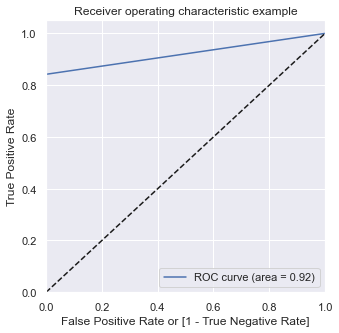

In [376]:
plot_roc(y_test, XGB_model_test_pred)

In [377]:
# Creating and training our 5th model: Multi Layer Perceptron Classifier

MLP = MLPClassifier()

params = {
        'hidden_layer_sizes':[(16,16),(16,),(16,16,16)],
        'activation':['logistic','relu','tanh'],
        'solver':['sgd','lbfgs','adam']
    }

kfolds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 10)

MLP_model = RandomizedSearchCV(MLP, params, cv=kfolds)

MLP_model.fit(X_train_sm, Y_train_sm)

#Getting the best estimators/hyperparameter values
print(MLP_model.best_estimator_)

MLPClassifier(hidden_layer_sizes=(16, 16, 16))


In [378]:
MLP_model_f = MLPClassifier(hidden_layer_sizes=(16, 16, 16), solver='lbfgs')

MLP_model_f.fit(X_train_sm, Y_train_sm)

MLP_model_train_pred = XGB_model_f.predict(X_train_sm)

MLP_model_test_pred = XGB_model_f.predict(X_test)

In [379]:
MLP_model_train_pred = pd.DataFrame(MLP_model_train_pred, columns=['Amount'])
MLP_model_test_pred = pd.DataFrame(MLP_model_test_pred, columns=['Amount'])

In [380]:
type(MLP_model_test_pred)

pandas.core.frame.DataFrame

In [381]:
# Appending model performance to the result dataframe


#For Train data
precision = metrics.precision_score(Y_train_sm, MLP_model_train_pred,average='macro')
recall = metrics.recall_score(Y_train_sm, MLP_model_train_pred,average='macro')
accuracy = metrics.accuracy_score(Y_train_sm, MLP_model_train_pred)

#For Test data
precision_test = metrics.precision_score(y_test, MLP_model_test_pred,average='macro')
recall_test = metrics.recall_score(y_test, MLP_model_test_pred,average='macro')
accuracy_test = metrics.accuracy_score(y_test, MLP_model_test_pred)

tempResults = pd.DataFrame({'Model':['MLP Classifier'], 'Precision_train': [precision],'Recall_train': [recall], 'Accuracy_train':[accuracy], 'Precision_test':[precision_test], 'Recall_test':[recall_test], 'Accuracy_test':[accuracy_test]})
results = pd.concat([results, tempResults])
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.985080,0.985080,0.595712,0.934072,0.988106
0,Random Forest Classifier,0.999955,0.999955,0.999955,0.931063,0.924601,0.999112
0,KNN Classifier,0.999563,0.999563,0.999563,0.792947,0.920127,0.997663
0,XGB Classifier,0.999995,0.999995,0.999995,0.905551,0.920748,0.998902
0,MLP Classifier,0.999995,0.999995,0.999995,0.905551,0.920748,0.998902


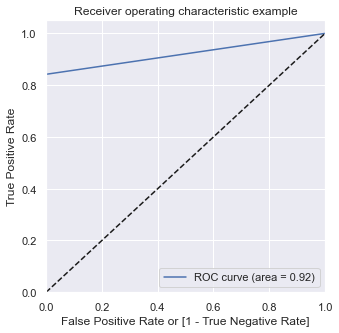

In [382]:
plot_roc(y_test, MLP_model_test_pred)

In [383]:
results

,Model,Precision_train,Recall_train,Accuracy_train,Precision_test,Recall_test,Accuracy_test
0,Logistic Regression,0.985104,0.985080,0.985080,0.595712,0.934072,0.988106
0,Random Forest Classifier,0.999955,0.999955,0.999955,0.931063,0.924601,0.999112
0,KNN Classifier,0.999563,0.999563,0.999563,0.792947,0.920127,0.997663
0,XGB Classifier,0.999995,0.999995,0.999995,0.905551,0.920748,0.998902
0,MLP Classifier,0.999995,0.999995,0.999995,0.905551,0.920748,0.998902


#### Final Insights

We have developed a solution for classifing fraudalent and non-fraudalent transactions for an financial institution. Imagine the loss that will incur to the institution if your model predicts just one user's transaction id as a non-fraudalent transaction. Here, the cost of false negative is huge. <br><br>

As the defition of **Recall** suggests, it should be used in the cases where the cost of false negative is more than false positive. Hence, for this problem I will be considering Recall as the evaluation metric. <br><br>

If we check the results dataframe we can see that Logistic Regression model has the highest recall score [0.93] of all the models.<br><br>

For this scenario **Logistic Regression** will be our final model.